# Initial Analysis of Telco Churn Dataset

## Imports and Useful Paths

In [1]:
# Helper libraries
import warnings

# Scientific and visual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Various settings
warnings.filterwarnings("ignore")
np.set_printoptions(precision=4)
sns.set_theme()
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_colwidth", 40)
pd.set_option("display.precision", 4)
pd.set_option("display.max_columns", None)

## Getting the Data

In [2]:
from churn_detection.paths import EXTERNAL_DATA_DIR

In [3]:
file_name = "customer_churn.feather"
churn = pd.read_feather(EXTERNAL_DATA_DIR / file_name)

## Data Understanding and Auditing

### Dataset Overview

#### Target

- **Churn**: Binary labels indicating if the client has canceled the contract (yes/no).

#### Services

- **PhoneService**: Binary value indicating whether the customer has phone service (yes/no).
- **StreamingMovies**: Nominal value indicating if the movie streaming service is enabled (yes/no/no internet).
- **StreamingTV**: Nominal value indicating if the TV streaming service is enabled (yes/no/no internet).
- **TechSupport**: Nominal value indicating if the customer has tech support (yes/no/no internet).
- **OnlineBackup**: Nominal value indicating if the online backup service is enabled (yes/no/no internet).
- **OnlineSecurity**: Nominal value indicating if online security is enabled (yes/no/no internet).
- **InternetService**: Nominal value indicating the type of internet service (no/fiber/optic).
- **MultipleLines**: Nominal value indicating whether the customer has multiple phone lines (yes/no/no phone service).
- **DeviceProtection**: Nominal value indicating if the device protection service is enabled (yes/no/no internet).

#### Accounts

- **customerID**: Nominal value representing the unique ID of the customer.
- **PaperlessBilling**: Binary value indicating if the billing is paperless (yes/no).
- **Contract**: Nominal value indicating the type of contract (monthly/yearly/two years).
- **PaymentMethod**: Nominal value representing the payment method (electronic check, mailed check, bank transfer, credit card).
- **tenure**: Integer count representing the number of months since the start of the contract (numeric).

#### Charges

- **MonthlyCharges**: Continuous value indicating the amount charged monthly (numeric).
- **TotalCharges**: Continuous value indicating the total amount charged (numeric).

#### Demographics

- **gender**: Binary value indicating the gender of the customer (male/female).
- **Dependents**: Binary value indicating whether the customer has dependents (yes/no).
- **Partner**: Binary value indicating whether the customer lives with a partner (yes/no).
- **SeniorCitizen**: Binary value indicating whether the customer is a senior citizen (0/1).


### Dataset Info

In [4]:
from churn_detection.utils import display_dataset_info

In [5]:
display_dataset_info(churn)

Dataset dimensions: 7043 rows and 21 columns
-----------------------------------
Attribute set:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
-----------------------------------
Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64


### ML Related Data Auditing

#### Target Preview

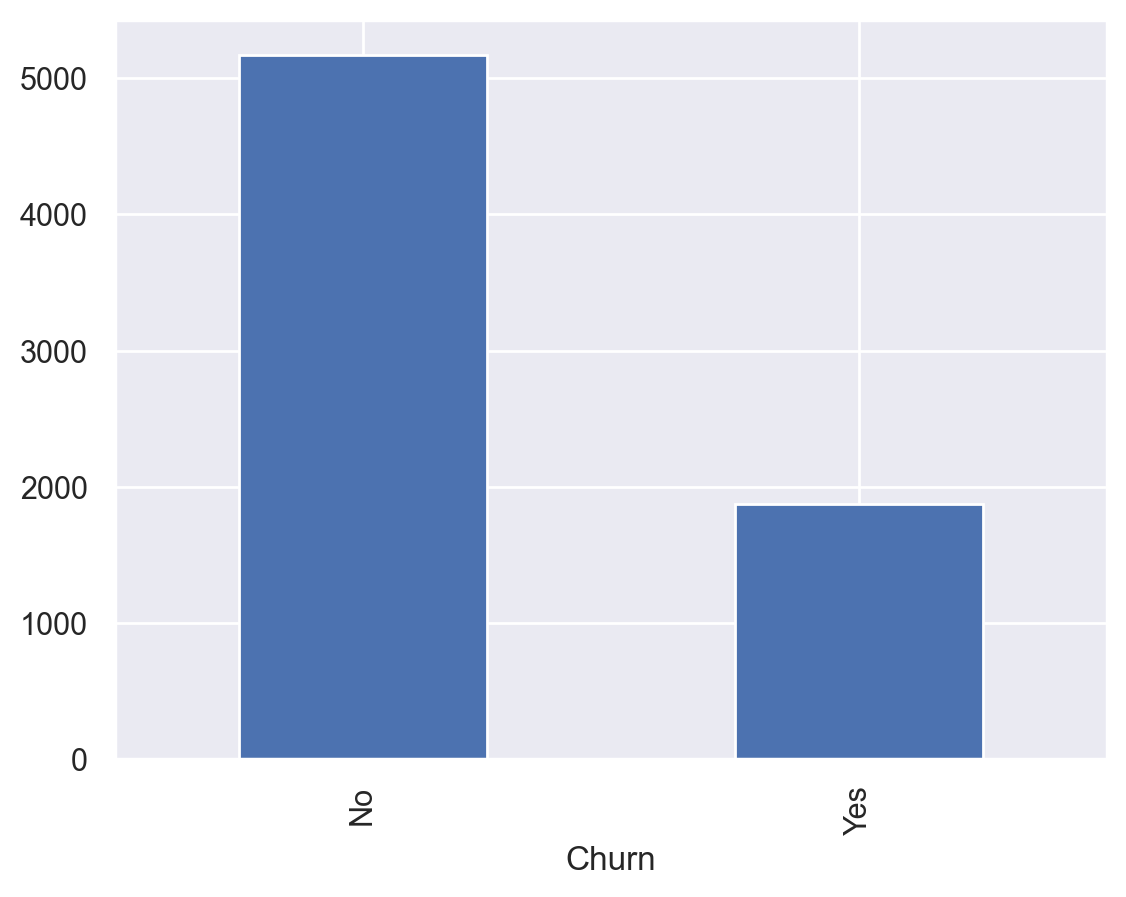

In [6]:
churn.Churn.value_counts().plot.bar();

In [7]:
churn.Churn.value_counts(normalize=True) * 100

Churn
No     73.463
Yes    26.537
Name: proportion, dtype: float64

### Analysis Outputs

- This is not a large dataset but should be interesting enough to build a classifier.
- Most variables are categorical (binary, nominal).
- Values in many categorical columns have inconsistencies.
- Some data types are not inferred correctly: SeniorCitizen and TotalCharges.
- customerID has the same number of items as dataset rows, which means it is useless.
- All columns don't have the same naming convention.
- Target variable is highly imbalaced and has string labels for positive and negative cases.